# “Real” Bitcoin Trading Volume

## Overview:

##### ● Aggregating the “real” volume of Bitcoin from January 1st, 2022 up to now, and 
##### plot it together with the Bitcoin price.
##### ● Listing out the important statistics of Bitcoin’s real volume from 2022 and discussing any
##### findings/correlations. 

# . EDA: Exploratory Data Analysis 

In [1]:
#Initial Exploration 1: first observations,

#Look for:

#missing data
#empty values
#data type issues
#basic descriptive statistics
#basic visualizations
#basic correlations
#etc.

### Load data file

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm

In [3]:
data_file = r"Bitcoin-Historical-Data-csv.csv"

In [4]:
df = pd.read_csv(data_file, encoding = "ISO-8859-1")

In [5]:
df.head(5)

,Date,Price($),Open,High,Low,Volume,Change(%)
0,2022-05-12T00:00:00Z,27605.9,29073.4,30136.7,26500.5,392730,-5.03
1,2022-05-11T00:00:00Z,29068.2,31008.0,32113.6,27835.5,296900,-6.25
2,2022-05-10T00:00:00Z,31007.5,30098.2,32621.2,29831.0,235610,3.03
3,2022-05-09T00:00:00Z,30095.0,34041.0,34227.0,30095.0,268090,-11.64
4,2022-05-08T00:00:00Z,34060.0,35468.0,35497.0,33727.0,671050000,-3.97


# Initial examination: na, nan, zero, descriptive statistics etc

### A good first step is to look at which columns are of interest and for those looking for null/na/nan/etc empty cells, or zero values, etc.

In [6]:
# for reference, how many rows are there in total
df.shape

(132, 7)

In [7]:
#Checking for missing values
df.isna().sum()

Date         0
Price($)     0
Open         0
High         0
Low          0
Volume       0
Change(%)    0
dtype: int64

In [8]:
#performing data deduplication
df.duplicated().sum()

0

In [9]:
df.describe()

,Price($),Open,High,Low,Volume,Change(%)
count,132.000000,132.000000,132.000000,132.000000,1.320000e+02,132.000000
mean,40695.198485,40836.646212,41740.271212,39747.412121,4.583296e+08,-0.327652
std,3599.356780,3443.095203,3407.840020,3659.641775,8.422841e+08,3.525848
min,27605.900000,29073.400000,30136.700000,26500.500000,2.578000e+04,-11.640000
25%,38489.200000,38505.150000,39583.150000,37611.050000,6.440000e+04,-2.172500
50%,40858.900000,40968.300000,41822.900000,39681.800000,7.585136e+07,-0.140000
75%,43074.750000,43079.525000,43930.775000,42117.000000,4.801800e+08,1.485000
max,47738.000000,47738.700000,48199.000000,47029.000000,4.470000e+09,14.590000


In [10]:
df.dtypes

Date          object
Price($)     float64
Open         float64
High         float64
Low          float64
Volume         int64
Change(%)    float64
dtype: object

In [11]:
#convert object to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.dtypes

Date         datetime64[ns, UTC]
Price($)                 float64
Open                     float64
High                     float64
Low                      float64
Volume                     int64
Change(%)                float64
dtype: object

In [13]:
df = df.set_index('Date')
df.tail(3)

,Price($),Open,High,Low,Volume,Change(%)
Date,,,,,,
2022-01-03 00:00:00+00:00,46430.2,47293.9,47556.0,45704.0,41060,-1.86
2022-01-02 00:00:00+00:00,47311.8,47738.7,47944.9,46718.2,27020,-0.89
2022-01-01 00:00:00+00:00,47738.0,46217.5,47917.6,46217.5,31240,3.29


In [14]:
df.index

DatetimeIndex(['2022-05-12 00:00:00+00:00', '2022-05-11 00:00:00+00:00',
               '2022-05-10 00:00:00+00:00', '2022-05-09 00:00:00+00:00',
               '2022-05-08 00:00:00+00:00', '2022-05-07 00:00:00+00:00',
               '2022-05-06 00:00:00+00:00', '2022-05-05 00:00:00+00:00',
               '2022-05-04 00:00:00+00:00', '2022-05-03 00:00:00+00:00',
               ...
               '2022-01-10 00:00:00+00:00', '2022-01-09 00:00:00+00:00',
               '2022-01-08 00:00:00+00:00', '2022-01-07 00:00:00+00:00',
               '2022-01-06 00:00:00+00:00', '2022-01-05 00:00:00+00:00',
               '2022-01-04 00:00:00+00:00', '2022-01-03 00:00:00+00:00',
               '2022-01-02 00:00:00+00:00', '2022-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=132, freq=None)

In [15]:
# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.strftime("%A")


In [16]:
# Display a random sampling of 5 rows
df.sample(5, random_state=0)

,Price($),Open,High,Low,Volume,Change(%),Year,Month,Weekday Name
Date,,,,,,,,,
2022-02-08 00:00:00+00:00,44038.2,43833.9,45399.8,42705.0,92880,0.47,2022,2,Tuesday
2022-03-07 00:00:00+00:00,38024.8,38420.6,39532.0,37182.1,3020000000,-0.99,2022,3,Monday
2022-04-16 00:00:00+00:00,40382.0,40571.0,40691.0,40003.0,151310000,-0.44,2022,4,Saturday
2022-05-04 00:00:00+00:00,39688.0,37717.0,40021.0,37660.0,691490000,5.22,2022,5,Wednesday
2022-04-12 00:00:00+00:00,40078.0,39507.0,40678.0,39265.0,468270000,1.47,2022,4,Tuesday


## Data Aggregation & Plotting

In [17]:
#Aggregation is the process of implementing any mathematical operation on
#a dataset or a subset of it. Aggregation is one of the many techniques in
#pandas that's used to manipulate the data in the dataframe for data analysis.

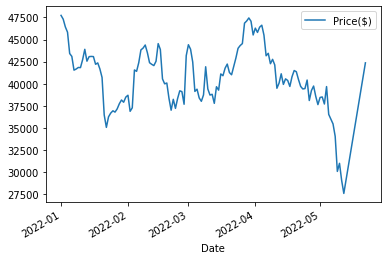

In [18]:
df.groupby(df.index).agg('sum').plot(kind='line', y='Price($)')
plt.savefig('output1.jpg')
plt.show()

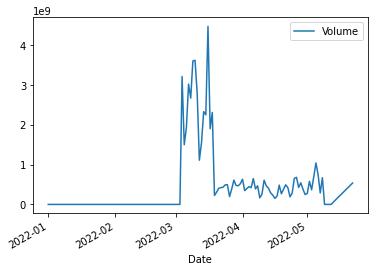

In [19]:
df.groupby(df.index).agg('sum').plot(kind='line', y='Volume')
plt.savefig('output2.png')
plt.show()

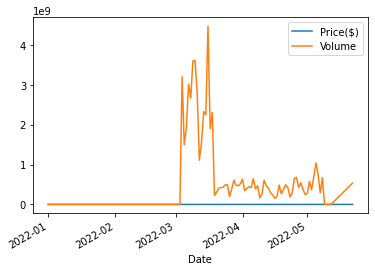

In [20]:
df.groupby(df.index).agg('sum').plot(kind='line', y=['Price($)', 'Volume'])
plt.savefig('output3.png')
plt.show()

### Important statistics of Bitcoin’s real volume from 2022

#### Measures Of Central Tendency

In [21]:
volume =df["Volume"]
mean = volume.mean()
median =volume.median()
mode = volume.mode()
print(mean, median, mode)

458329598.7121212 75851365.0 0           25780
1           25880
2           27020
3           28660
4           31200
          ...    
127    3020000000
128    3210000000
129    3600000000
130    3620000000
131    4470000000
Length: 132, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


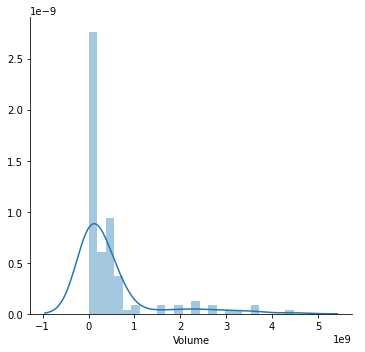

In [22]:
#distribution plot
sns.FacetGrid(df,size=5).map(sns.distplot,"Volume").add_legend()

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


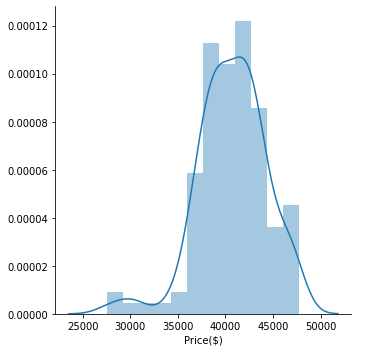

In [23]:
sns.FacetGrid(df,size=5).map(sns.distplot,"Price($)").add_legend()

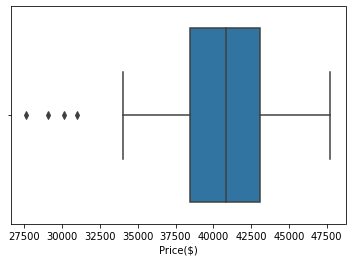

In [24]:
#boxplot for price of bitcoin
sns.boxplot(x="Price($)",data=df)
plt.show()


Text(0, 0.5, 'Price($)')

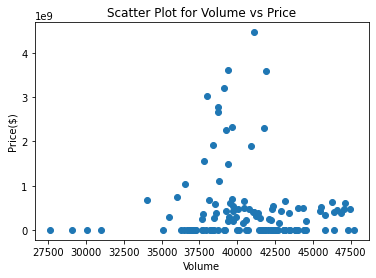

In [25]:
# plot the relationship between “volume” and ”price”
plt.scatter(df["Price($)"], df["Volume"])
plt.title("Scatter Plot for Volume vs Price")
plt.xlabel("Volume")
plt.ylabel("Price($)")


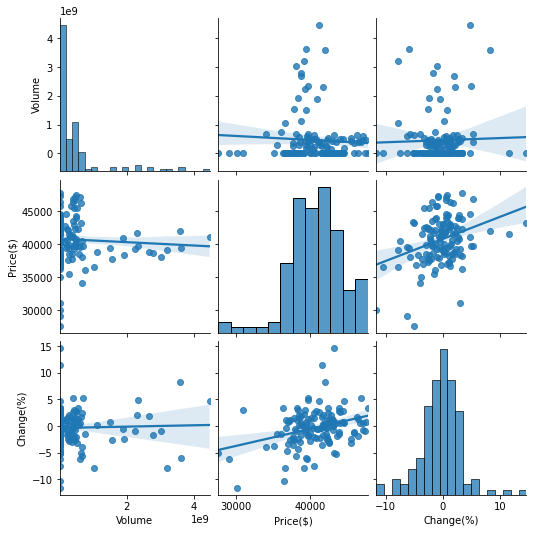

In [26]:
# pair plot with plot type regression
sns.pairplot(df,vars = ['Volume', 'Price($)','Change(%)'], kind="reg")
plt.show()


In [45]:
from scipy import stats
corr = stats.pearsonr(df["Price($)"], df["Change(%)"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])


p-value:	 0.00012455196193768303
cor:		 0.3278084661161298


In [46]:
correlation = df.corr(method='pearson')
correlation


,Price($),Open,High,Low,Volume,Change(%),Year,Month
Price($),1.000000,0.923335,0.965554,0.970351,-0.059374,0.327808,NaN,-0.241648
Open,0.923335,1.000000,0.967843,0.964146,-0.071047,-0.058498,NaN,-0.219982
High,0.965554,0.967843,1.000000,0.958009,-0.045820,0.132236,NaN,-0.231152
Low,0.970351,0.964146,0.958009,1.000000,-0.073914,0.148540,NaN,-0.202325
Volume,-0.059374,-0.071047,-0.045820,-0.073914,1.000000,0.030436,NaN,0.262634
Change(%),0.327808,-0.058498,0.132236,0.148540,0.030436,1.000000,NaN,-0.101279
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,-0.241648,-0.219982,-0.231152,-0.202325,0.262634,-0.101279,NaN,1.000000


<AxesSubplot:>

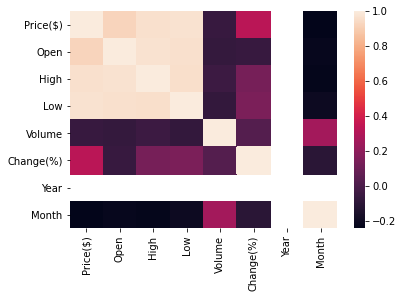

In [47]:
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns)


###### Mean:  458329598.7121212
###### Median: 75851365.0
###### Mode:25780

#### Measures Of Dispersion

In [48]:
#standard variance of dataset using std() function
std_dev =df.std()
print(std_dev)

Price($)     3.599357e+03
Open         3.443095e+03
High         3.407840e+03
Low          3.659642e+03
Volume       8.422841e+08
Change(%)    3.525848e+00
Year         0.000000e+00
Month        1.311262e+00
dtype: float64


In [49]:
# standard variance of the specific column(volume)
sv_volume=df.loc[:,"Volume"].std()
print(sv_volume)

842284098.2204366


In [50]:
# variance of dataset using var() function
variance=df.var()
print(variance)

Price($)     1.295537e+07
Open         1.185490e+07
High         1.161337e+07
Low          1.339298e+07
Volume       7.094425e+17
Change(%)    1.243160e+01
Year         0.000000e+00
Month        1.719408e+00
dtype: float64


In [51]:
# variance of the specific column(volume)
var_volume=df.loc[:,"Volume"].var()
print(var_volume)

7.09442502115014e+17


## Skewness

###### In probability theory and statistics, skewness is a measure of the asymmetry of the variable in the dataset about its mean. The skewness value can be positive or negative, or undefined. The skewness value tells us whether the data is skewed or symmetric. 

In [52]:
df.loc[:,"Volume"].skew() 

2.7189748870410475

## Kurtosis

###### Kurtosis, is the measure of outlier presence in a given distribution. Both high and low kurtosis are an indicator that data needs further investigation. The higher the kurtosis, the higher the outliers. 


In [53]:
#Kurtosis Of the Volume
# Kurtosis of the specific column
value=df.loc[:,"Volume"].kurt()
print(value)

7.400269246832298


This distribution has skew 2.7189748870410475
This distribution has kurtosis 7.400269246832298


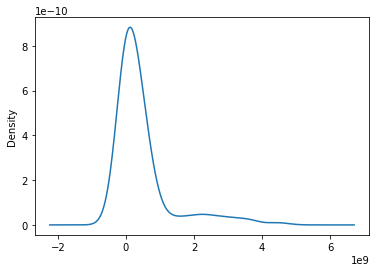

In [54]:
norm=df.Volume
norm.plot(kind = 'density')
print('This distribution has skew', norm.skew())
print('This distribution has kurtosis', norm.kurt())
plt.savefig('output4.png')

##### The graph on the left-hand side has a tail that is longer on the right hand side. If you select any point on the right-hand tail, the mean value is greater than the mode. Hence it is positively skewed

##### The distribution has kurtosis greater than 3 and the fat tails indicate that the distribution produces more outliers, hence it is Leptokurtic 

### Percentiles 

In [55]:
#50th percentile
volume = df["Volume"]
percentile = np.percentile(volume, 50,)
print(percentile)

75851365.0


######  A pattern is shown as the 50th percentile corresponds to the median

In [56]:
#Upper Quartile
volume = df["Volume"]
percentile = np.percentile(volume, 75,)
print(percentile)

480180000.0


In [57]:
#Lower Quartile
volume = df["Volume"]
percentile = np.percentile(volume, 25,)
print(percentile)

64400.0


### Quartiles

In [58]:
#Deducing the Inter-Quartile Range
volume = df.Volume.sort_values()
Q1 = np.percentile(volume, 25)
Q2 = np.percentile(volume, 50)
Q3 = np.percentile(volume, 75)
IQR = Q3 - Q1
IQR


480115600.0

In [59]:
#Visualizing the Quartiles

In [60]:
df2=df.select_dtypes(exclude=['object'])

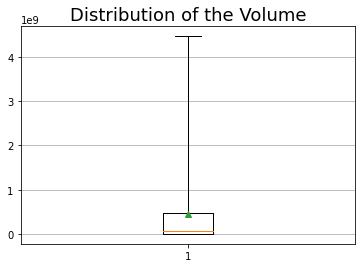

In [61]:
box = plt.boxplot(df.Volume, showmeans=True, whis = 99)
plt.grid(True, axis='y')  
plt.title('Distribution of the Volume', fontsize=18) 
plt.savefig('output5.png')
plt.show()

### The preceding diagram illustrates the fact that the box goes from the upper to the lower quartile (around 70 thousand and 500 million), while the whiskers (the bars extending from the box) go to a minimum of 30 thousand and a maximum of 4.5 billion. The redline is the median (around 70 million), whereas the little triangle (green color) is the mean. 
